# Final Project

In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be `price` column. **Do not forget, this is a Classification problem!**

## Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

## Steps
- Read the `diamonds.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification). *Hint: Is there any imbalanced problem in the label column?*
- Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Berke Ateş Aytekin</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [138]:
# Read csv
df = pd.read_csv("diamonds.csv")
df

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
df.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


It is not possible to have all of x, y and z features equal to 0. I think this is a missing value situation rather than outlier so instead of eliminating them, I will fill these features with mean of them in preprocessing step.

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [128]:
df.groupby(by="price").count()

,index,carat,cut,color,clarity,depth,table,x,y,z
price,,,,,,,,,,
High,2308,2308,2308,2308,2308,2308,2308,2308,2308,2308
Low,11271,11271,11271,11271,11271,11271,11271,11271,11271,11271
Medium,4109,4109,4109,4109,4109,4109,4109,4109,4109,4109
Very High,1589,1589,1589,1589,1589,1589,1589,1589,1589,1589
Very Low,34663,34663,34663,34663,34663,34663,34663,34663,34663,34663


In [13]:
df.price.value_counts()

Very Low     34663
Low          11271
Medium        4109
High          2308
Very High     1589
Name: price, dtype: int64

In [31]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [32]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [33]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [5]:
df.isna().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [9]:
df.isin(['?']).sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

There is not any value which is null or including "?". I also checkhed if there is another indicator other than "?" to represent missing values by applying value_counts() function to each string (non-numeric) feature.

# Exploratory Data Analysis

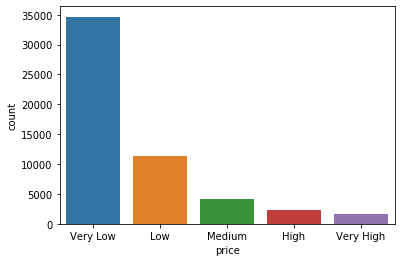

In [3]:
# Our label Distribution (countplot)

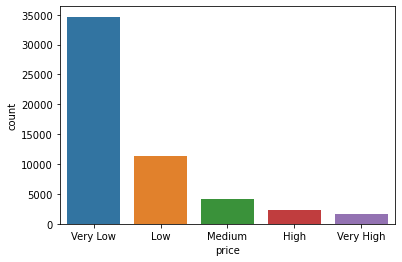

In [14]:
sns.countplot(x="price", data=df)

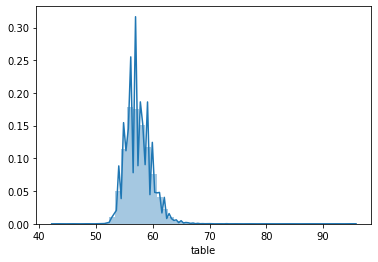

In [4]:
# Example EDA (distplot)


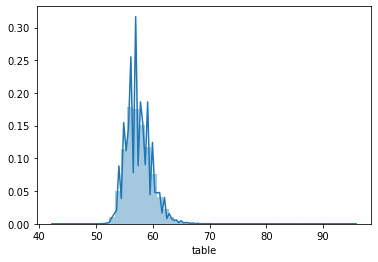

In [26]:
sns.distplot(df.table)

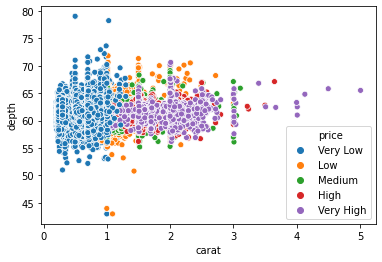

In [21]:
sns.scatterplot(x="carat", y="depth", hue="price", data=df)

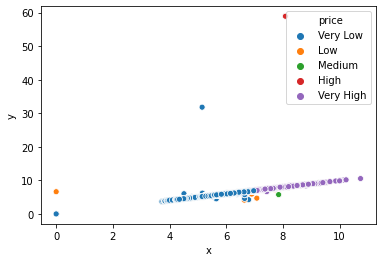

In [22]:
sns.scatterplot(x="x", y="y", hue="price", data=df)

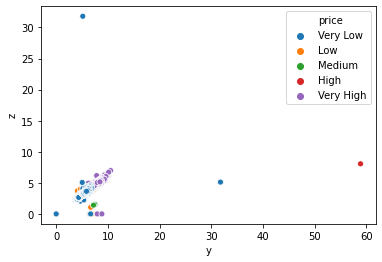

In [23]:
sns.scatterplot(x="y", y="z", hue="price", data=df)

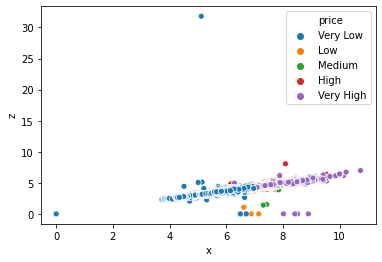

In [24]:
sns.scatterplot(x="x", y="z", hue="price", data=df)

I drawed this three graphs in order to see if there is a linear relationship between x, y, z features with price since I was planning to define a new feature "volume" using x, y, and z features.

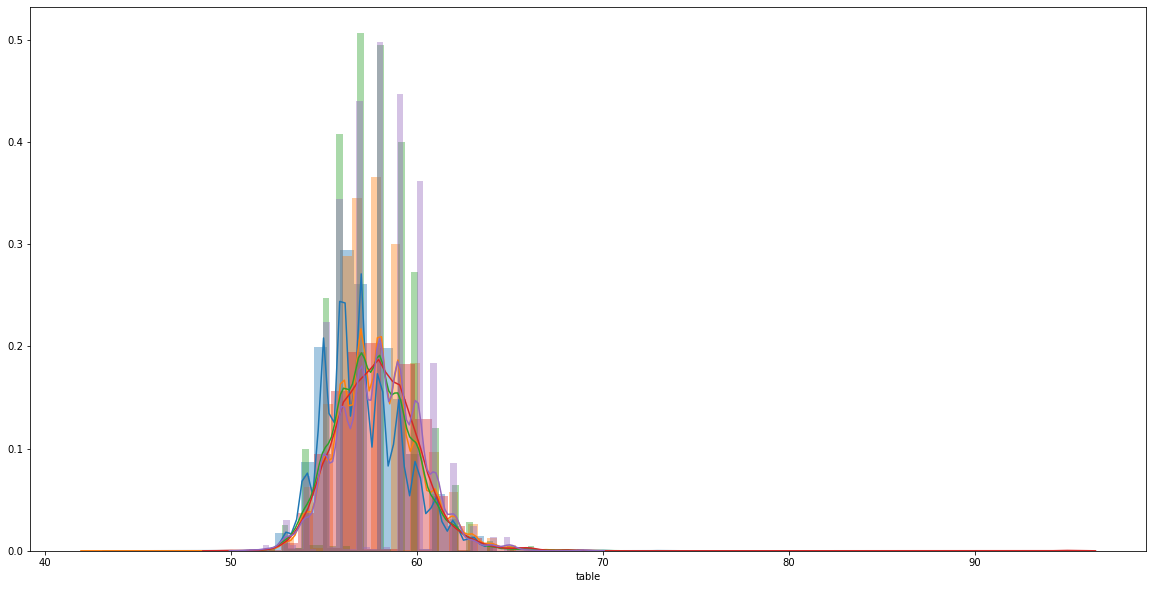

In [30]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.distplot(df[df.price == "Very Low"].table)
sns.distplot(df[df.price == "Low"].table)
sns.distplot(df[df.price == "Medium"].table)
sns.distplot(df[df.price == "High"].table)
sns.distplot(df[df.price == "Very High"].table)

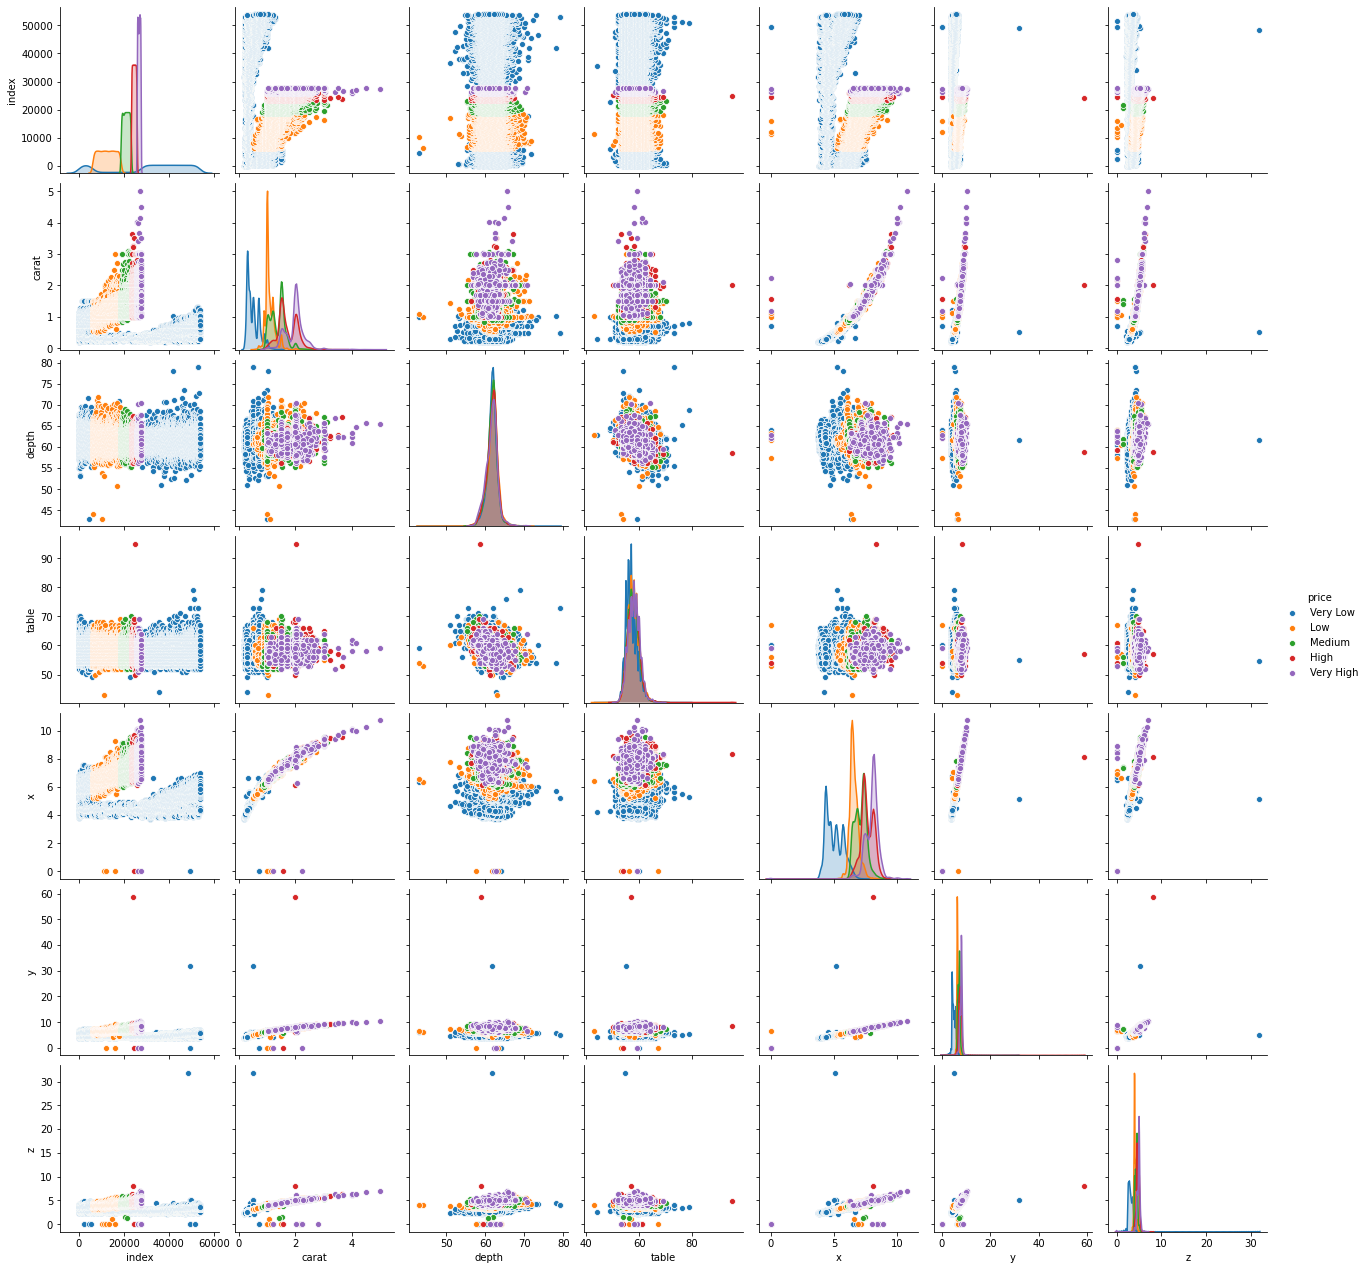

In [28]:
sns.pairplot(df, hue="price")

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split dataset into train and test sets. (0.7/0.3)

In [34]:
# I have already checked duplicated values but I will do it again.
df.duplicated().sum()

0

In [41]:
x = np.abs(df["x"])
x_out = list(set(np.where(x == 0)[0]))
x_out

[26243, 27429, 24520, 11182, 15951, 49556, 49557, 11963]

In [42]:
y = np.abs(df["y"])
y_out = list(set(np.where(y == 0)[0]))
y_out

[26243, 27429, 24520, 15951, 49556, 49557, 11963]

In [139]:
z = np.abs(df["z"])
z_out = list(set(np.where(z == 0)[0]))
z_out

[26243,
 2314,
 26123,
 49556,
 49557,
 2207,
 13601,
 27429,
 11182,
 51506,
 10167,
 4791,
 11963,
 24520,
 24394,
 15951,
 27739,
 5471,
 27112,
 27503]

In [133]:
for i in x_out:
    if(i not in z_out):
        print("Flag 1")
        
for i in y_out:
    if(i not in z_out):
        print("Flag 2")

I assume it is not possible to have a 2D or 1D diamonds. <br>
z_out already contains all data entries with at least one missing feature.

In [140]:
x_mean = df["x"].mean()
y_mean = df["y"].mean()
z_mean = df["z"].mean()
for i in z_out:
    if(df["x"].iloc[i]==0): df["x"].iloc[i] = x_mean
    if(df["y"].iloc[i]==0): df["y"].iloc[i] = y_mean
    if(df["z"].iloc[i]==0): df["z"].iloc[i] = z_mean

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [73]:
df.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low


In [141]:
# I should drop the index feature.
df.drop(["index"], axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low


In [142]:
# Encoding the ordinal string features.
enc_dic = {"cut" : {"Fair" : 1, "Good" : 2, "Very Good" : 3, "Premium" : 4, "Ideal" : 5},
          "color" : {"J" : 1,"I" : 2,"H" : 3,"G" : 4,"F" : 5,"E" : 6,"D" : 7},
          "clarity" : {"I1" : 1, "SI2" : 2, "SI1" : 3, "VS2" : 4, "VS1" : 5, "VVS2" : 6,
                       "VVS1" : 7, "IF" : 8}}
df = df.replace(enc_dic)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,5,6,2,61.5,55.0,3.95,3.98,2.43,Very Low
1,0.21,4,6,3,59.8,61.0,3.89,3.84,2.31,Very Low
2,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31,Very Low
3,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63,Very Low
4,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75,Very Low


In [143]:
# Encoding the label.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["price"]) 
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,Label
0,0.23,5,6,2,61.5,55.0,3.95,3.98,2.43,Very Low,4
1,0.21,4,6,3,59.8,61.0,3.89,3.84,2.31,Very Low,4
2,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31,Very Low,4
3,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63,Very Low,4
4,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75,Very Low,4


In [84]:
categories = list(label_encoder.inverse_transform([0, 1, 2, 3, 4]))
categories

['High', 'Low', 'Medium', 'Very High', 'Very Low']

In [144]:
# Input output sets
df.drop(["price"], axis=1, inplace=True)
X, y = df.iloc[: , :-1], df.iloc[: , -1]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,5,6,2,61.5,55.0,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75


In [89]:
y.head()

0    4
1    4
2    4
3    4
4    4
Name: Label, dtype: int32

In [145]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
X_s = MinMaxScaler().fit_transform(X)
X_s

array([[0.00623701, 1.        , 0.83333333, ..., 0.03138374, 0.00543281,
        0.04425643],
       [0.002079  , 0.75      , 0.83333333, ..., 0.02282454, 0.0028975 ,
        0.04035145],
       [0.00623701, 0.25      , 0.83333333, ..., 0.04564907, 0.00706266,
        0.04035145],
       ...,
       [0.1039501 , 0.5       , 1.        , ..., 0.27532097, 0.03621876,
        0.08102831],
       [0.13721414, 0.75      , 0.33333333, ..., 0.34522111, 0.04418689,
        0.08688578],
       [0.11434511, 1.        , 1.        , ..., 0.29957204, 0.03965954,
        0.08363163]])

In [146]:
# Splitting datasets
# For unbalanced labels, I add stratify parameter.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [94]:
y_train.value_counts()

4    24264
1     7890
2     2876
0     1616
3     1112
Name: Label, dtype: int64

In [147]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y, test_size=0.3, random_state=123, stratify=y)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [98]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

def dtree(a):
    clf = DecisionTreeClassifier(max_depth=a, random_state=42)
    clf.fit(X_train,y_train)
    print("Accuracy of train:",clf.score(X_train,y_train))
    print("Accuracy of test:",clf.score(X_test,y_test))

In [148]:
dtree(3)
dtree(5)
dtree(7)
dtree(9)
dtree(11) # best of them
dtree(12)

Accuracy of train: 0.855924572276074
Accuracy of test: 0.8528612038066988
Accuracy of train: 0.8895598283807405
Accuracy of test: 0.8843159065628476
Accuracy of train: 0.9083902749086287
Accuracy of test: 0.8993943888270919
Accuracy of train: 0.9306372159542349
Accuracy of test: 0.9113212211098751
Accuracy of train: 0.9531490015360983
Accuracy of test: 0.9247311827956989
Accuracy of train: 0.9608824619948091
Accuracy of test: 0.9233098504511186


In [149]:
def dtreescaled(a):
    clf = DecisionTreeClassifier(max_depth=a, random_state=42)
    clf.fit(X_s_train,y_s_train)
    print("Accuracy of train:",clf.score(X_s_train,y_s_train))
    print("Accuracy of test:",clf.score(X_s_test,y_s_test))
dtreescaled(10)
dtreescaled(11) # best
dtreescaled(12)

Accuracy of train: 0.9414428730335294
Accuracy of test: 0.9189840563589173
Accuracy of train: 0.9531490015360983
Accuracy of test: 0.9245457916203189
Accuracy of train: 0.9608824619948091
Accuracy of test: 0.9233098504511186


In [150]:
clf = DecisionTreeClassifier(max_depth=11, random_state=42)
clf.fit(X_s_train,y_s_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

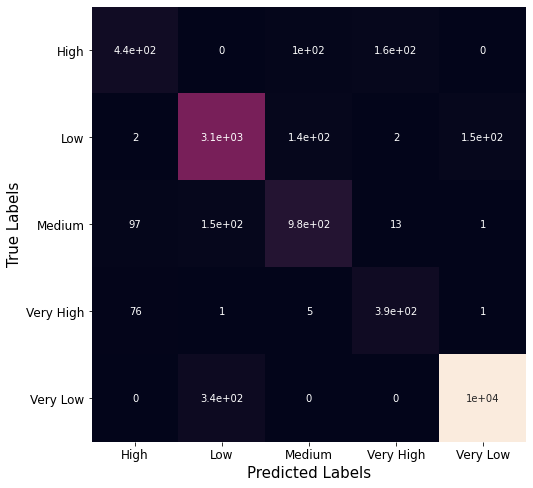

In [151]:
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_s_test)
cm = confusion_matrix(y_s_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [152]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
print(classification_report(y_s_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67       692
           1       0.87      0.91      0.89      3381
           2       0.80      0.79      0.80      1233
           3       0.70      0.83      0.76       477
           4       0.99      0.97      0.98     10399

    accuracy                           0.92     16182
   macro avg       0.81      0.83      0.82     16182
weighted avg       0.93      0.92      0.92     16182



In [153]:
# Gradient Tree Boosting
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(max_depth=12, random_state=42).fit(X_s_train, y_s_train)
print("Accuracy of train:",clf.score(X_s_train,y_s_train))
print("Accuracy of test:",clf.score(X_s_test,y_s_test))

Accuracy of train: 0.9999470310927485
Accuracy of test: 0.9335063650970213


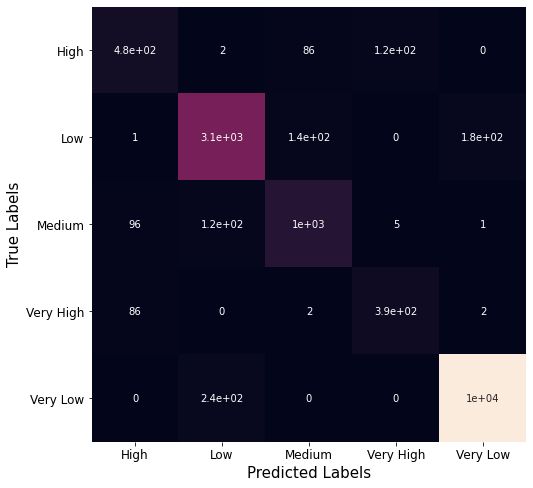

In [154]:
pred = clf.predict(X_s_test)
cm = confusion_matrix(y_s_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [155]:
print(classification_report(y_s_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       692
           1       0.90      0.91      0.90      3381
           2       0.82      0.82      0.82      1233
           3       0.75      0.81      0.78       477
           4       0.98      0.98      0.98     10399

    accuracy                           0.93     16182
   macro avg       0.83      0.84      0.84     16182
weighted avg       0.93      0.93      0.93     16182



0.9999 is really high for accuracy of train. There is a possibility of overfitting. I will change the max_depth parameters to find a more reliable model.

In [156]:
clf = GradientBoostingClassifier(max_depth=8, random_state=42).fit(X_s_train, y_s_train)
print("Accuracy of train:",clf.score(X_s_train,y_s_train))
print("Accuracy of test:",clf.score(X_s_test,y_s_test))

Accuracy of train: 0.9983049949679538
Accuracy of test: 0.9344333209739216


In [118]:
clf = GradientBoostingClassifier(max_depth=6, random_state=42).fit(X_s_train, y_s_train)
print("Accuracy of train:",clf.score(X_s_train,y_s_train))
print("Accuracy of test:",clf.score(X_s_test,y_s_test))

Accuracy of train: 0.9801366597807087
Accuracy of test: 0.9346805092077617


In [157]:
clf = GradientBoostingClassifier(max_depth=5, random_state=42).fit(X_s_train, y_s_train)
print("Accuracy of train:",clf.score(X_s_train,y_s_train))
print("Accuracy of test:",clf.score(X_s_test,y_s_test)) # best

Accuracy of train: 0.9671063085968536
Accuracy of test: 0.935545668026202


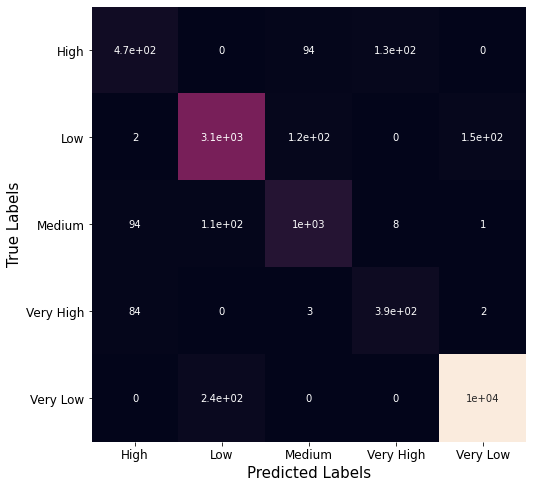

In [158]:
pred = clf.predict(X_s_test)
cm = confusion_matrix(y_s_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [159]:
print(classification_report(y_s_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       692
           1       0.90      0.92      0.91      3381
           2       0.82      0.82      0.82      1233
           3       0.74      0.81      0.77       477
           4       0.99      0.98      0.98     10399

    accuracy                           0.94     16182
   macro avg       0.83      0.84      0.84     16182
weighted avg       0.94      0.94      0.94     16182



In [160]:
# Support Vector Machines
from sklearn import svm
clf = svm.SVC()
clf.fit(X_s_train, y_s_train)
print("Accuracy of train:",clf.score(X_s_train,y_s_train))
print("Accuracy of test:",clf.score(X_s_test,y_s_test))

Accuracy of train: 0.9306107315006091
Accuracy of test: 0.9281300210109998


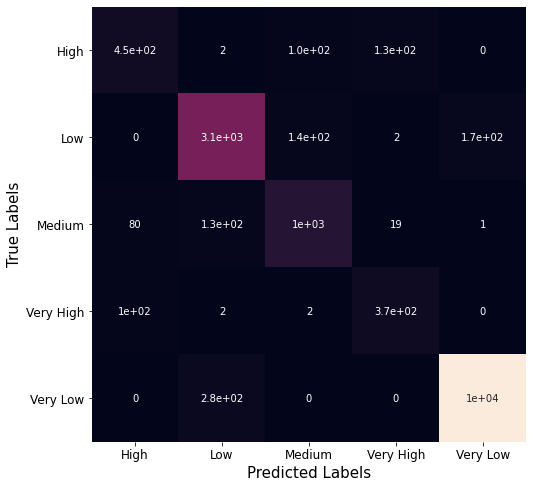

In [161]:
pred = clf.predict(X_s_test)
cm = confusion_matrix(y_s_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [162]:
print(classification_report(y_s_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       692
           1       0.88      0.91      0.89      3381
           2       0.80      0.82      0.81      1233
           3       0.71      0.78      0.74       477
           4       0.98      0.97      0.98     10399

    accuracy                           0.93     16182
   macro avg       0.82      0.83      0.82     16182
weighted avg       0.93      0.93      0.93     16182



# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

The diamonds with "Very High" price are more valuable. It is also more important to detect them since they are the counter least. So, I choose the precision and recall values of "Very High" priced diamonds which is category 3.
In Gradient Boosting Classifier with max_depth = 12, these metrics are the highest. So, I choose that one.